# Homework 11

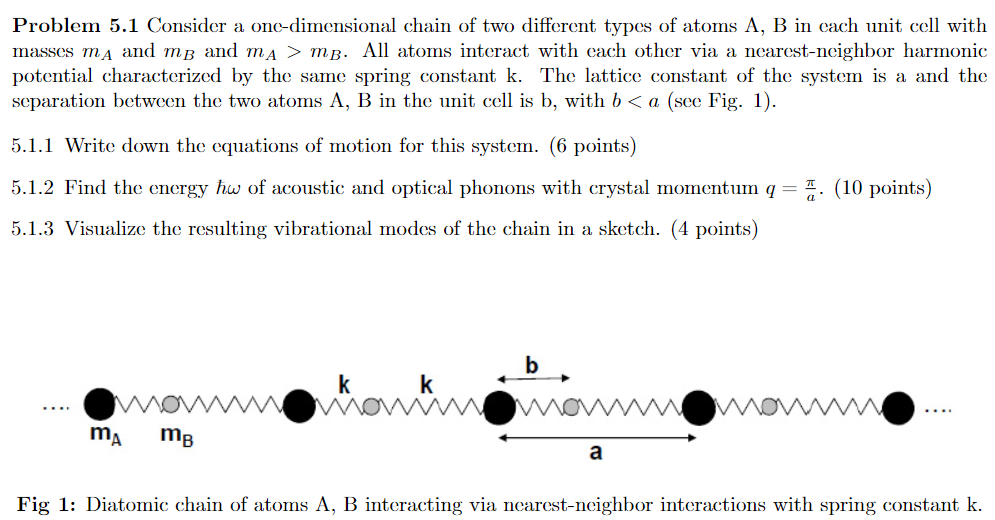

This isn't so bad.

EOM: Straight from class

$$
x_n = na + \delta x_n \quad
y_n = na + b + \delta y_n \\
\delta x_n = x_n - na \quad
\delta y_n = y_n - na - b
$$

Distances:
$$
y_n - x_n = b + \delta y_n - \delta x_n \\
x_n - y_{n-1} = na + \delta x_n - (n-1)a - b - \delta y_{n-1} = (a-b) + \delta x_n - \delta y_{n-1}
$$

Our equilibrium distances are $(a-b)$ for $y_{n-1}$ an $x_{n}$, and $b$ for $x_n$ and $y_n$, so we can find our spring forces.

$$
F_{yn-1\rightarrow xn} = -k(\delta x_n - \delta y_{n-1}) \\
F_{yn\rightarrow xn} = -k(\delta x_n - \delta y_{n}) \\
m_A \ddot{\delta x_n} = -k(\delta x_n - \delta y_{n-1})-k(\delta x_n - \delta y_{n})\\
= k(\delta y_{n-1} + \delta y_{n} - 2\delta x_n)
$$
The $-2 \delta x_n$ term comes from the restorative force of both atoms combining to push $x_n$ back into equilibrium

$$
F_{xn\rightarrow yn} = -F_{yn\rightarrow xn} = k(\delta x_n - \delta y_{n}) \\
F_{xn+1\rightarrow yn} = -k(\delta y_n - \delta x_{n+1}) = k(\delta x_{n+1}-\delta y_n)\\
m_B \ddot{\delta y_n} = k (\delta x_n + \delta x_{n+1} - 2 \delta y_n)
$$



Phonons. Aren't optical phonons just photons? Anyways...


In order to find phonon energies $\hbar \omega$, we need our $\omega$. Let's start with the plane wave ansatz and see if we can get rid of our $n$ dependence.

$$
\delta x_n(t) = A_xe^{i\omega t - i\vec k(na)}
\delta y_n(t) = A_ye^{i\omega t - i\vec k(na)}
$$

We'll switch our notation to prevent confusion. Spring constant is now $K$ and wave vector is $k$

$$
m_A \ddot{\delta x_n} = K(\delta y_{n-1} + \delta y_{n} - 2\delta x_n) \\
m_B \ddot{\delta y_n} = K(\delta x_n + \delta x_{n+1} - 2 \delta y_n)
$$

Fortunately, our EOM is the same from in class, so we can use a similar procedure to find $\omega$

$$
-m\omega^2 A_x e^{i \omega t - ikna} = KA_y (e^{i\omega t - ikna}+e^{i\omega t - ik(n-1)a}) - 2KA_x e^{i\omega t - ikna} \\
-m \omega^2 A_x = -2KA_x  + (1+e^{ika})KA_y \\

-m\omega^2 A_y e^{i \omega t - ikna} = KA_x (e^{i\omega t - ikna}+e^{i\omega t - ik(n+1)a}) - 2KA_y e^{i\omega t - ikna} \\
-m\omega^2 A_y = -2KA_y + (1+e^{-ika})KA_x
$$

From here we can solve the eigenvalue problem to get $\omega$

$$
-m \omega^2 \begin{pmatrix} A_x \\ A_y \end{pmatrix} = 
\begin{bmatrix} 
-2K & (1 + e^{ika})K \\ 
(1 + e^{-ika})K & -2K \end{bmatrix} 
\begin{pmatrix} A_x \\ A_y \end{pmatrix} \\
\lambda = -m \omega^2 \\
\text{det}(M-\lambda I) = 0 \\
(m \omega^2 - 2K)^2 - (1 + e^{ika})(1 + e^{-ika})K^2 = 0 \\
$$
Using $ (1 + e^{ika})(1 + e^{-ika}) = 2\cos(ka)+2 = 4\cos^2\left(\frac{ka}{2}\right)$, we obtain
$$
(m \omega^2 - 2K)^2 = 4K^2\cos^2\left(\frac{ka}{2}\right) \\
m \omega^2 = 2K \pm 2K \cos\left(\frac{ka}{2}\right) \\
\omega^2 = \frac{2K}{m} \left(1\pm \cos\left(\frac{ka}{2}\right)\right)
$$

Aparently crystal momentum is a scalar of wave vector in this context? Or equivalent mod $\pi/a$?

Using $q=k$
$$
\omega^2 = \frac{2K}{m} \left(1 \pm \cos\left(\frac{\pi}{2}\right)\right) \\
= \frac{2K}{m}
$$
This indicates that acoustic and optical phonons have the same energy at the cell boundary, which appears to match our sketches in class

It was at this point I realized I could've gotten this answer by plugging in k = q in the determinant step.

$$
\omega = \sqrt{\frac{2K}{m}} \\
E = \hbar \omega = \hbar\sqrt{\frac{2K}{m}}
$$

From wikipedia: $q = \hbar k=\frac{\pi}{a}$
$$
ka = \frac{\pi}{\hbar} \\
\omega^2 = \frac{2K}{m} \left(1 \pm \cos\left(\frac{\pi}{2\hbar}\right) \right)
$$
That doesn't make sense, the inside of the cosine should be unitless.

Let's go ahead and sketch the result for various $k$ values using python

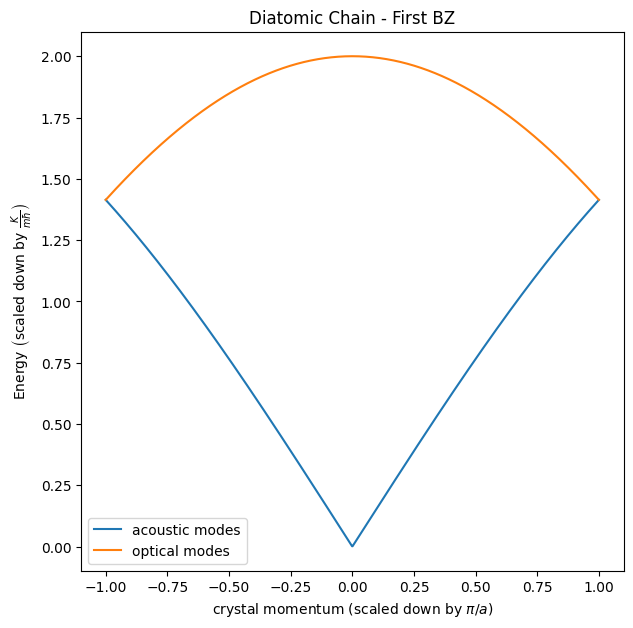

In [21]:
import numpy as np
from numpy import cos, pi, sqrt
import matplotlib.pyplot as plt
from scipy.constants import hbar

def accoustic(k):
    return sqrt(2*(1-cos(k/2)))

def optical(k):
    return sqrt(2*(1+cos(k/2)))

k_range = np.linspace(-pi, pi, 1000)

plt.figure(figsize=(7,7))
plt.title('Diatomic Chain - First BZ')
plt.plot(k_range/pi, accoustic(k_range), label='acoustic modes')
plt.plot(k_range/pi, optical(k_range), label='optical modes')
plt.xlabel(r'crystal momentum (scaled down by $\pi/a$)')
plt.ylabel(r'Energy $\left(\text{scaled down by }\frac{K}{m\hbar}\right)$')
plt.legend();